<a href="https://colab.research.google.com/github/Gapinian/Network-Science-ICN-2024/blob/main/S7_applied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 7
## Applied network science

## Epidemic spreading

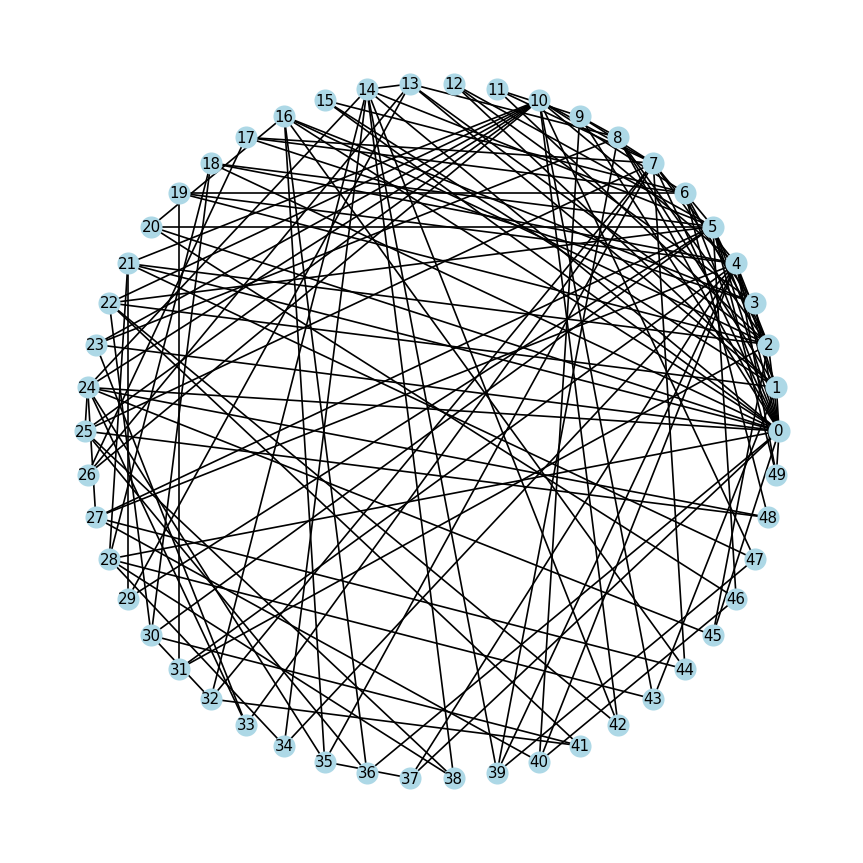

In [168]:
import networkx as nx

n = 50 # how many people (they will arrive one by one)
conn = 3 # how many connections each arriving person forms
G = nx.barabasi_albert_graph(n, conn)
L = nx.circular_layout(G)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (7, 7), dpi =  120)
S = 'lightblue'
nx.draw(G, L, node_color = S, node_size = 150)
l = nx.draw_networkx_labels(G, pos = L, font_size = 9)

In [169]:
from random import sample

perc = 0.07 # what percentage will be initially infected
sickPeople = round(perc * n)
print(n, sickPeople)
infected = sample(list(G.nodes), sickPeople)

50 4


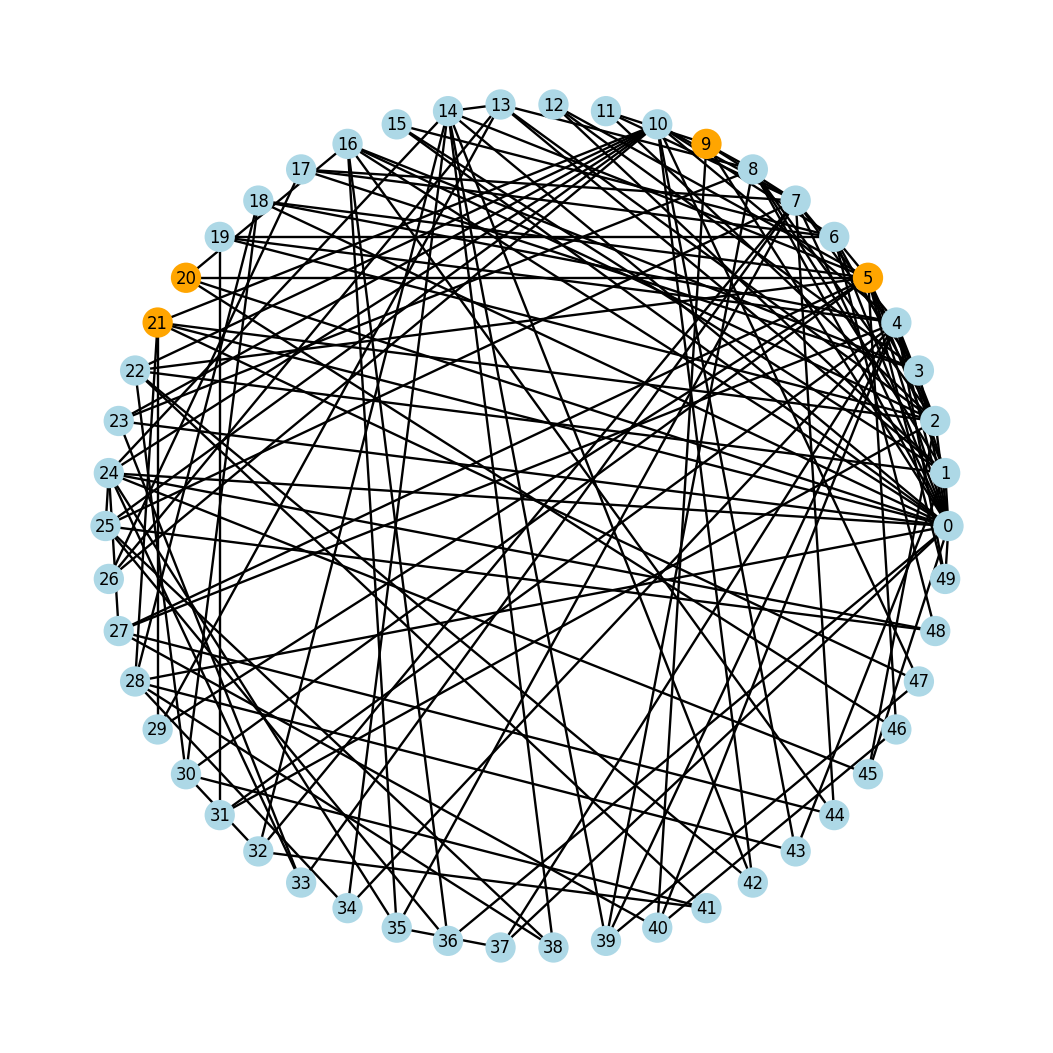

In [170]:
I = 'orange'
state = [ I if v in infected else S for v in G.nodes ]
fig = plt.figure(1, figsize = (6, 6), dpi =  170)
nx.draw(G, L, node_color = state, node_size = 140)
l = nx.draw_networkx_labels(G, pos = L, font_size = 7)

In [210]:
from random import random

def contagions(contagion = 0.6, safe = 0.75):
  global spread, infected, newlyInfected
  for v in infected:
      for u in G.neighbors(v):
        if u in infected: # already sick
          continue
        if u in recovered and random() > safe:
          continue
        if random() < contagion:
          spread.add((v, u))
          spread.add((u, v))
          newlyInfected.add(u)
  infected.update(newlyInfected)

In [211]:
def recoveries(recovery = 0.2):
  global recovered, infected, newlyInfected
  for v in infected:
    if v not in newlyInfected:
      if random() < recovery:
        recovered.add(v)
  infected -= recovered
  newlyInfected = set()

In [212]:
R = 'green'

def visualize():
  global G, L, infected, recovered, spread
  Vs = [ I if v in infected else (R if v in recovered else S) for v in G.nodes ]
  Es = [ I if (v, u) in spread else 'black' for v, u in G.edges ]
  nx.draw(G, L, node_color = Vs, edge_color = Es)
  l = nx.draw_networkx_labels(G, pos = L)

In [218]:
from random import random

deadpeople = set()

def dead(death = 0.4):
  global deadpeople, infected
  for v in infected:
    if v in infected and random() < death:
      deadpeople.add(v)
  infected -= deadpeople

In [219]:
D = 'black'

def visualize():
  global G, L, infected, recovered, spread, deadpeople
  Vs = [I if v in infected else (R if v in recovered else (D if v in deadpeople else S)) for v in G.nodes]
  Es = [ I if (v, u) in spread else 'black' for v, u in G.edges ]
  nx.draw(G, L, node_color = Vs, edge_color = Es)
  l = nx.draw_networkx_labels(G, pos = L)

In [220]:
def epidemic(t):
  visualize()
  contagions()
  recoveries()
  dead()

def init(people = 12, contacts = 3, perc = 0.2, show = True):
  global G, L, recovered, spread, infected, newlyInfected
  G = nx.barabasi_albert_graph(people, contacts)
  L = nx.circular_layout(G)
  recovered = set() # nobody yet
  spread = set() # nothing yet
  newlyInfected = set()
  infected = set(sample(list(G.nodes), round(perc * people)))
  deadpeople = set()
  if show:
    visualize()

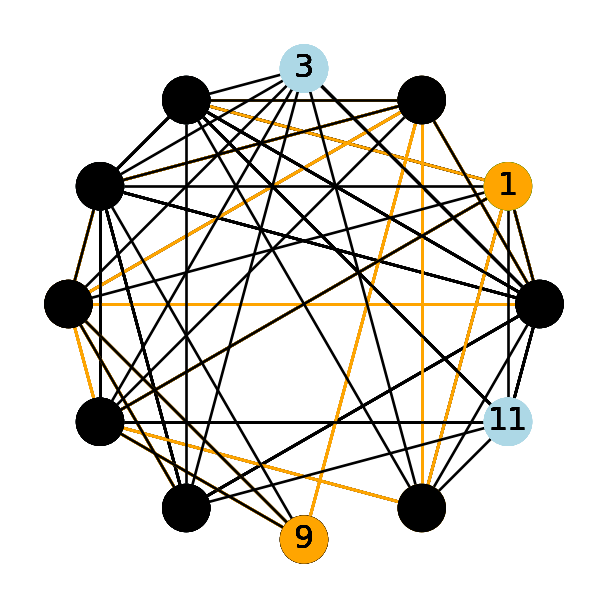

In [221]:
from matplotlib import rc
rc('animation', html = 'jshtml')
import matplotlib.animation as animation

duration = 7
fig = plt.figure(figsize = (3, 3), dpi = 190)
plt.clf()

animation.FuncAnimation(fig, epidemic, frames = duration, repeat = False, init_func = init, interval = 300)

In [222]:
timeseries = { 'S' : [], 'I' : [], 'R' : [], 'D':[] }
n = 2000
init(n, 5, 0.01, show = False)
i = len(infected)
timeseries['I'].append(i)
timeseries['S'].append(n - i)
timeseries['R'].append(0)
timeseries['D'].append(0)

permitted = 100
while len(infected) > 0 and permitted > 0:
    contagions(0.6, 0.9)
    recoveries(0.1)
    dead(0.2)
    i = len(infected)
    r = len(recovered)
    d = len (deadpeople)
    s = n - (i + r) # the rest
    timeseries['S'].append(s)
    timeseries['I'].append(i)
    timeseries['R'].append(r)
    timeseries['D'].append(d)
    timeseries
    permitted -= 1

for kind in timeseries:
  print(kind, timeseries[kind][:5], timeseries[kind][-5:])

S [1980, 1915, 1529, 773, 720] [1419, 1419, 1420, 1421, 1421]
I [20, 84, 460, 1172, 1109] [5, 4, 2, 1, 0]
R [0, 1, 11, 55, 171] [576, 577, 578, 578, 579]
D [0, 34, 139, 400, 694] [1418, 1418, 1419, 1420, 1420]


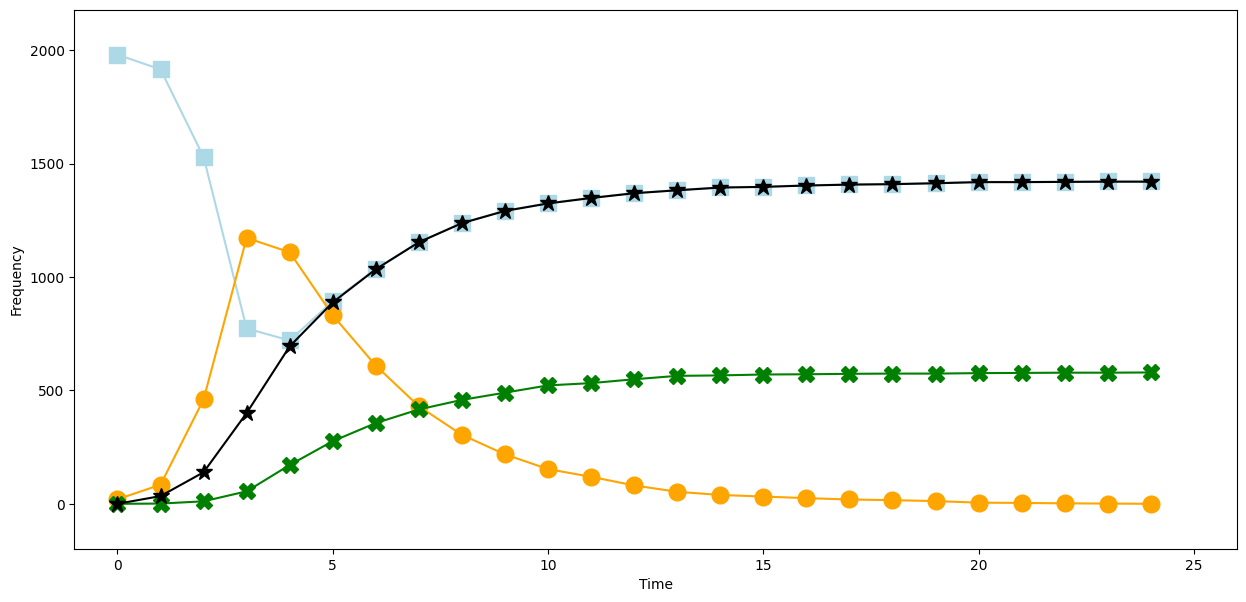

In [223]:
fig = plt.figure(figsize = (15, 7), dpi =  100)
ax = plt.subplot(1, 1, 1)
l = len(timeseries['S'])
plt.xlim(-1, l + 1)
high = max ( [ max(d) for d in timeseries.values() ] )
margin = 0.1 * high
plt.ylim(0 - margin, high + margin)
color = { 'I' : I, 'S' : S, 'R' : R, 'D': D }
marker = { 'I' : 'o', 'S' : 's', 'R' : 'X', 'D' : '*'}
t = [ i for i in range(l) ]
for kind in timeseries:
    ax.plot(t, timeseries[kind], c = color[kind], marker = marker[kind], ms = 12)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

## Natural language processing

In [1]:
!pip install gutenbergpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 20.3 MB/s eta 0:00:00
  Created wheel for httpsproxy-urllib2: filename=httpsproxy_urllib2-1.0-py3-none-any.whl size=29252 sha256=6b427d14ef29b6a28ecd937b8ce02025bf07b6512cb1a6ace829e53bbd1eeacd
  Stored in directory: /root/.cache/pip/wheels/1b/fa/c3/4c14e72101070c40b56c2bfb4617e510e68f121e4f736a5d2a
Successfully built httpsproxy-urllib2


In [2]:
target = 28054 # Brothers Karamazov
import gutenbergpy.textget
raw = gutenbergpy.textget.get_text_by_id(target) # access the book content
content = gutenbergpy.textget.strip_headers(raw) # remove header metadata
text = content.decode("utf-8") # encoding of the content

The last line above makes the text readable

In [24]:
marker = 'Alexey Fyodorovitch Karamazov was the third son of Fyodor Pavlovitch'
start = text.index(marker)
othermarker = 'exclamation: “Hurrah for Karamazov!”'
end = text.index(othermarker) + len(othermarker)
book = text[start:end]

In [25]:
from string import punctuation
print(punctuation)
removed = book.translate(str.maketrans(punctuation, ' ' * len(punctuation))) # substitute with space

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
import re # regular expressions
from string import printable
print('Allow these:', printable)

Allow these: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [27]:
forbid = f'[^{re.escape(printable)}]' # everything else must go
ok = re.sub(forbid, ' ', removed)
clean = re.compile(r'\s+')
cleaner = clean.sub(' ', ok) # remove repeated spaces

In [28]:
words = cleaner.split() # break it into individual words

def keep(word):
  if len(word) < 2: # keep I and A
    return True
  return not word.isupper()

good = list(filter(keep, words))

In [37]:
good[200:220]

['majority',
 'of',
 'these',
 'fantastical',
 'fellows',
 'are',
 'shrewd',
 'and',
 'intelligent',
 'enough',
 'but',
 'just',
 'senselessness',
 'and',
 'a',
 'peculiar',
 'national',
 'form',
 'of',
 'it']

In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
goodset = set(good)
print(len(good), len(goodset))

359451 13087


In [56]:
def keepAgain(w):
  #return not (w.lower() in sw) and not (w.isdigit()) and len(w) > 2
  return w[0].isupper() and len(w) > 4 and not (w.lower() in goodset)

better = list(filter(keepAgain, good))

In [57]:
better[200:250]

['Alyosha',
 'Yefim',
 'Petrovitch',
 'Polenov',
 'Alyosha',
 'Karamazov',
 'Yefim',
 'Petrovitch',
 'Alyosha',
 'Italy',
 'Alyosha',
 'Yefim',
 'Petrovitch',
 'Alyosha',
 'Alyosha',
 'Pyotr',
 'Alexandrovitch',
 'Alyosha',
 'Fyodor',
 'Pavlovitch',
 'Fyodor',
 'Pavlovitch',
 'Russia',
 'Odessa',
 'Jewesses',
 'Jewkins',
 'Alyosha',
 'Grigory',
 'Fyodor',
 'Pavlovitch',
 'Alyosha',
 'Alyosha',
 'Alyosha',
 'Grigory',
 'Alyosha',
 'Alyosha',
 'Grigory',
 'Fyodor',
 'Pavlovitch',
 'Odessa',
 'Alyosha',
 'Grigory',
 'Fyodor',
 'Pavlovitch',
 'Alyosha',
 'Adela',
 'Ivanovna',
 'Alyosha',
 'Roman',
 'Roman']

In [58]:
distinct = set(better)

def singularize(word):
  lc = word.lower()
  if lc in distinct:
    word = lc
  if word[-1] == 's': # ends in 's'
    cropped = word[:-1]
    if cropped in distinct:
      return cropped
  return word

In [59]:
simple = [ singularize(w) for w in better ]

In [87]:
import networkx as nx

middle = len(simple) // 2
length = 50

graph = nx.DiGraph() # for directed edges
sequence = simple.copy()[ 0 : length ] # just a fragment

In [88]:
currentWord = sequence.pop(0)
while len(sequence) > 0:
  followingWord = sequence.pop(0)
  if graph.has_edge(currentWord, followingWord):
    graph[currentWord][followingWord]['weight'] += 1
  else:
    graph.add_edge(currentWord, followingWord, weight = 1)
  currentWord = followingWord

In [89]:
pos = nx.spring_layout(graph) # calculate positions (this takes a long time)

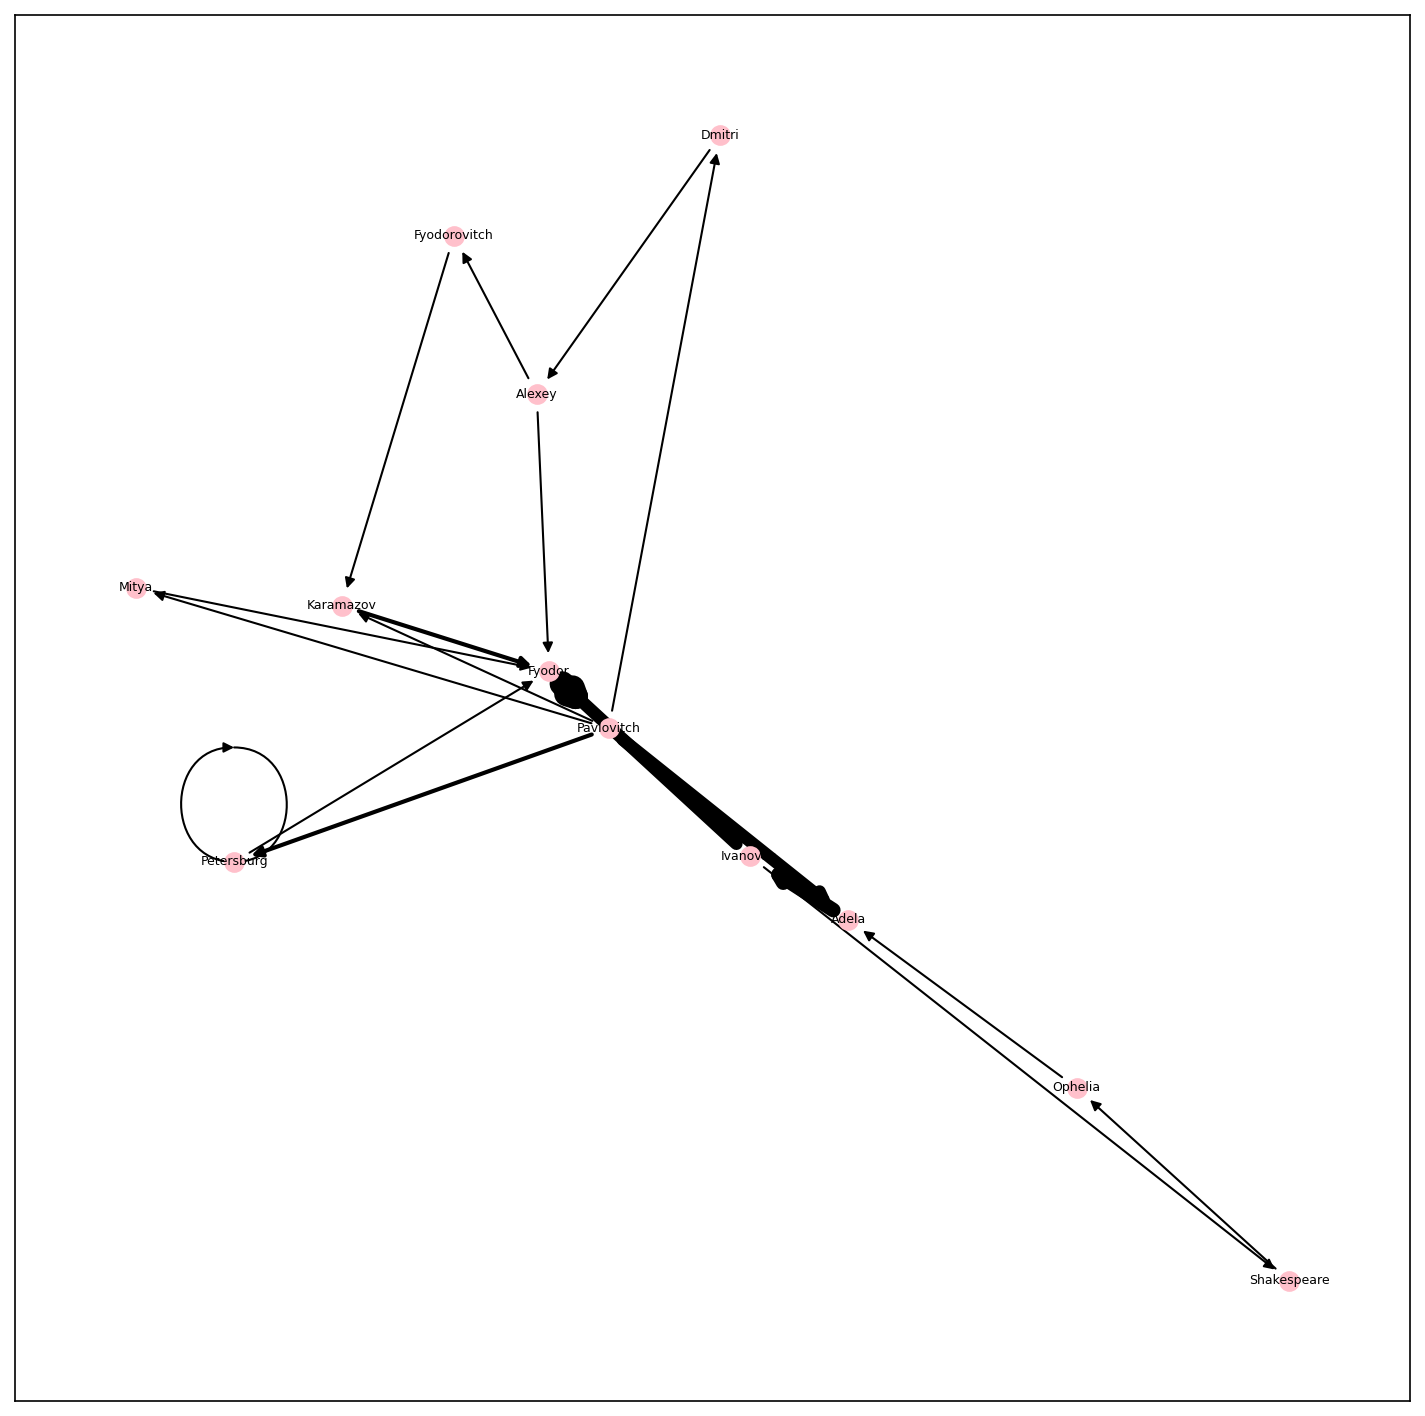

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (12, 12), dpi =  150)
V = nx.draw_networkx_nodes(graph, pos, node_size = 80, node_color = 'pink')

w = [ graph[u][v]['weight'] for u, v in graph.edges ]
E = nx.draw_networkx_edges(graph, pos, width = w)
vl = nx.draw_networkx_labels(graph, pos, font_size = 6)

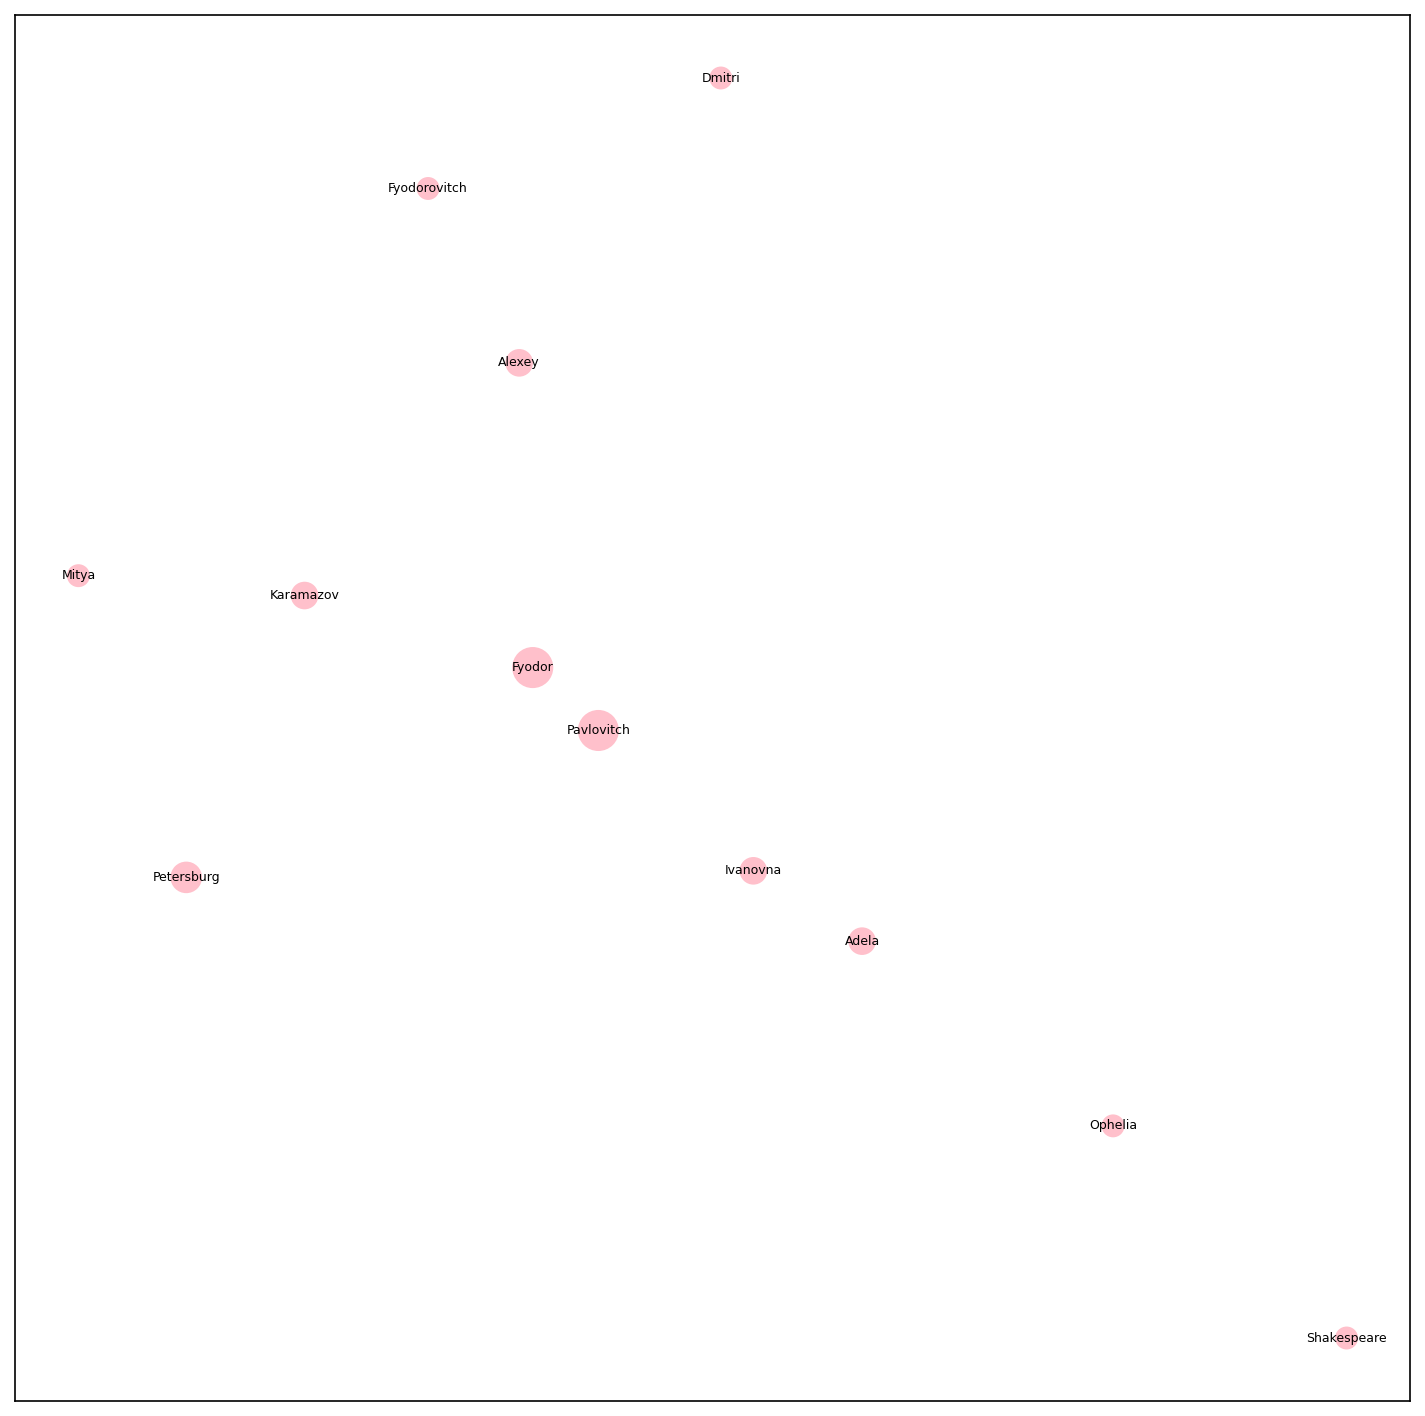

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (12, 12), dpi =  150)

degree = [ 50 * graph.degree[v] for v in graph.nodes ]

V = nx.draw_networkx_nodes(graph, pos, node_size = degree, node_color = 'pink')

w = [ graph[u][v]['weight'] for u, v in graph.edges ]
#E = nx.draw_networkx_edges(graph, pos, width = w)
vl = nx.draw_networkx_labels(graph, pos, font_size = 6)

In [94]:
g = nx.Graph()
whole = simple.copy()
currentWord = whole.pop(0)
while len(whole) > 0:
  followingWord = whole.pop(0)
  if g.has_edge(currentWord, followingWord):
    g[currentWord][followingWord]['weight'] += 1
  else:
    g.add_edge(currentWord, followingWord, weight = 1)
  currentWord = followingWord

In [95]:
ditch = []
threshold = 5
for e in g.edges():
  (s, t) = e
  if g[s][t]['weight'] < threshold:
    ditch.append(e)

g.remove_edges_from(ditch)
floaters = list(nx.isolates(g))
g.remove_nodes_from(floaters)

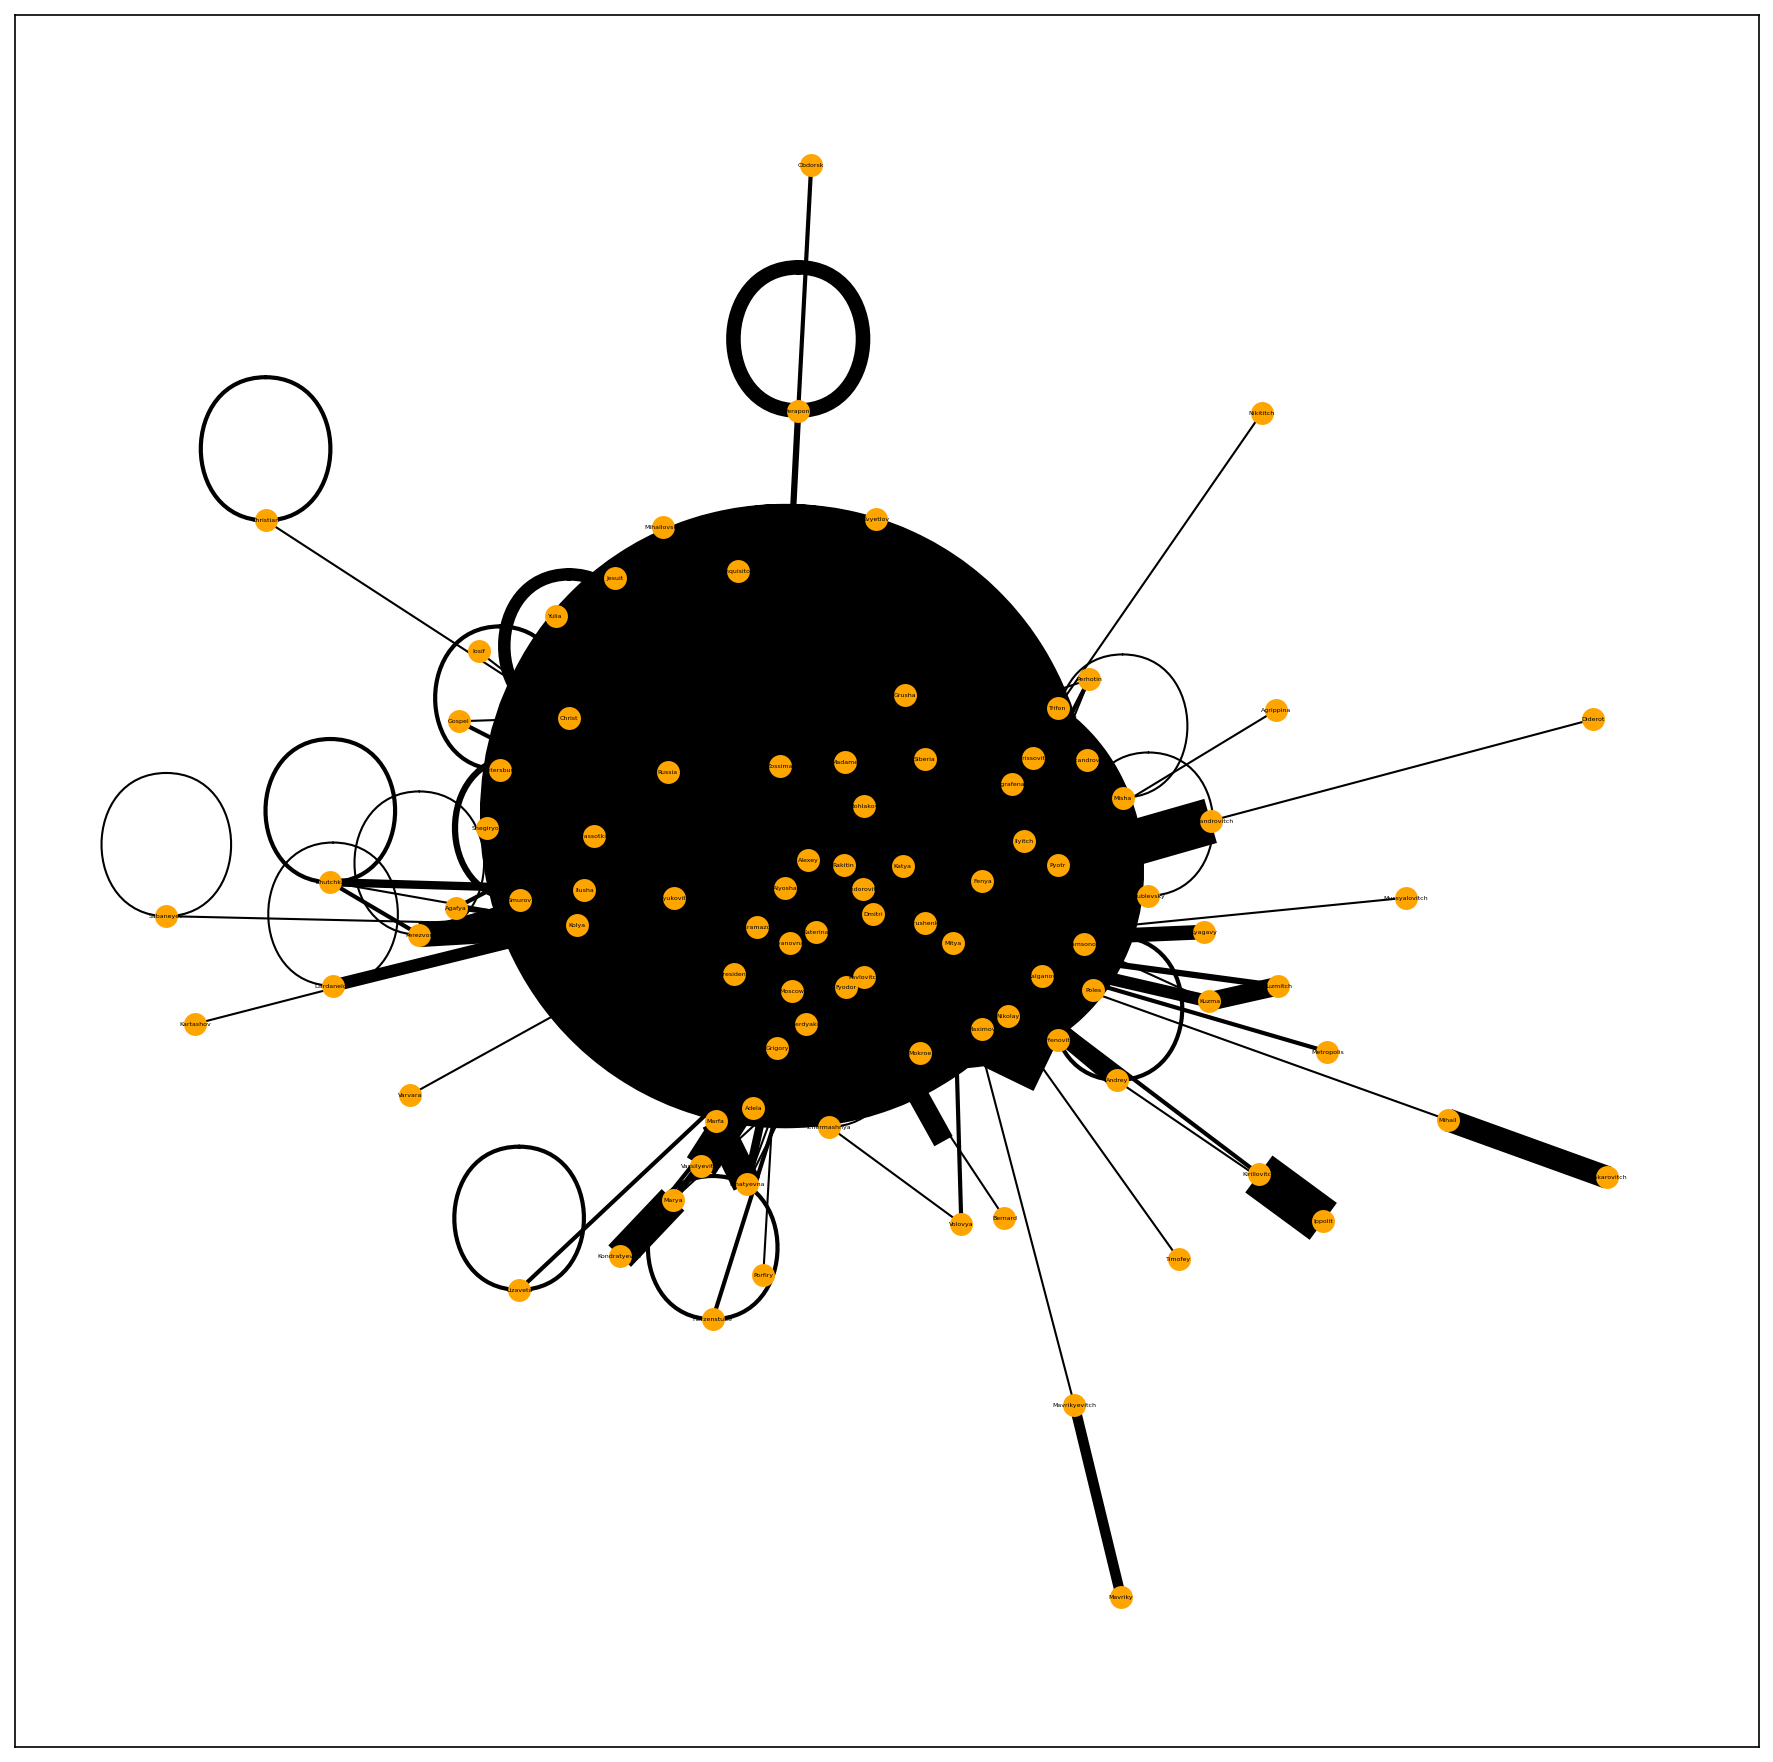

In [98]:
lcc = g.subgraph(max(nx.connected_components(g), key=len))

fig = plt.figure(1, figsize = (15, 15), dpi =  150)
p2 = nx.spring_layout(lcc)
V = nx.draw_networkx_nodes(lcc, p2, node_size = 100, node_color = 'orange')

w = [ (lcc[u][v]['weight'] - threshold) // 2 + 1 for u, v in lcc.edges ]

E = nx.draw_networkx_edges(lcc, p2, width = w)
vl = nx.draw_networkx_labels(lcc, p2, font_size = 3)